In [55]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
%matplotlib inline
sns.set()
%matplotlib inline
# loading data
data=pd.read_csv('petroleo.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105 entries, 0 to 4104
Data columns (total 7 columns):
fecha       4105 non-null object
ultimo      4105 non-null float64
apertura    4105 non-null float64
maximo      4105 non-null float64
minimo      4105 non-null float64
vol         4105 non-null object
var         4105 non-null float64
dtypes: float64(5), object(2)
memory usage: 224.6+ KB


In [41]:
for n in range(data.shape[0]):
    if data.loc[n,'vol']=="-":
        data.loc[n,'vol']=0
data.vol=data.vol.astype(float)
data.head()

,fecha,ultimo,apertura,maximo,minimo,vol,var
0,18.01.2019,53.80,52.23,53.92,52.09,0.0,3.32
1,17.01.2019,52.07,52.30,52.58,50.98,288560.0,-0.46
2,16.01.2019,52.31,52.00,52.52,51.26,694180.0,0.38
3,15.01.2019,52.11,50.78,52.30,50.64,664180.0,3.17
4,14.01.2019,50.51,51.73,52.11,50.38,791530.0,-2.09


## 1. EXPLORATORY DATA ANALYSIS

(<matplotlib.axes._subplots.AxesSubplot at 0x269901bc978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x269901bc978>)

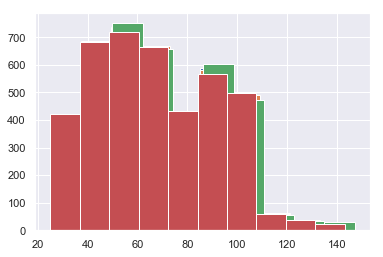

In [31]:
# Distribution 
data.ultimo.hist(), data.apertura.hist(), data.maximo.hist(), data.minimo.hist()

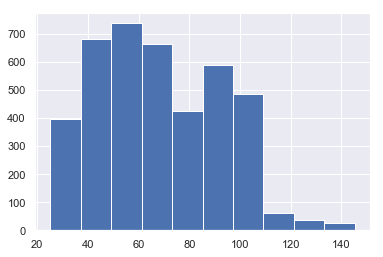

In [32]:
data.ultimo.hist()

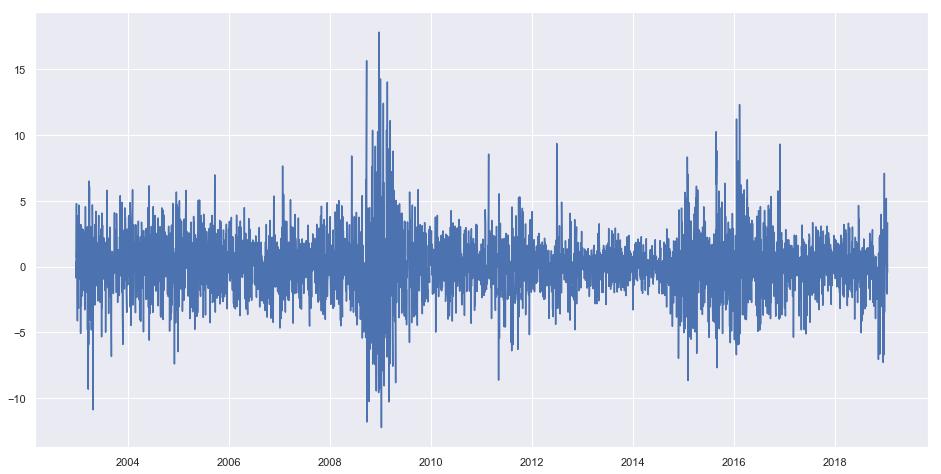

In [33]:
#setting index as date
data['fecha'] = pd.to_datetime(data.fecha,format='%d.%m.%Y')
data.index = data['fecha']

#Plot Daily Return
plt.figure(figsize=(16,8))
plt.plot(data['var'], label='Rend Diario')

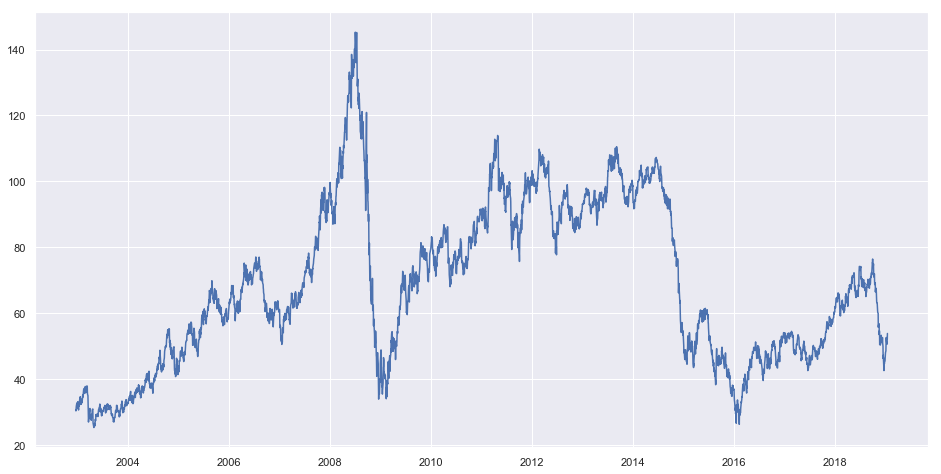

In [37]:
# Plot Close Price
plt.figure(figsize=(16,8))
plt.plot(data['ultimo'], label='Close Price history')

 # 1.2.Trend and seasonality in TS

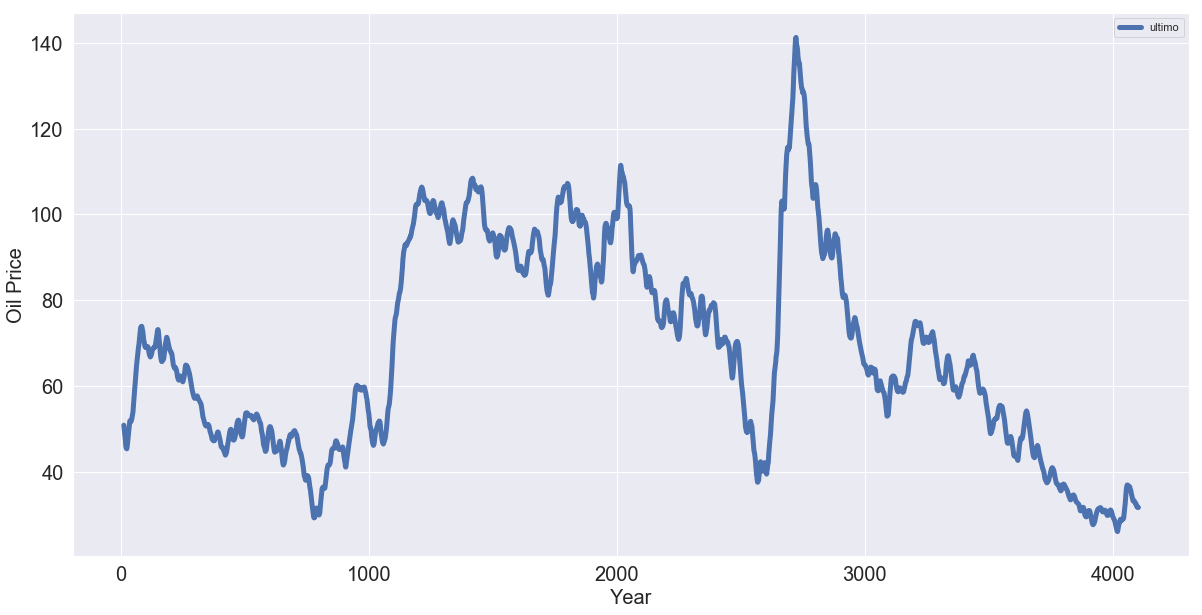

In [42]:
# remove the trend mensual
oil = data[['ultimo']]
oil.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Oil Price', fontsize=20)
plt.xlabel('Year', fontsize=20);

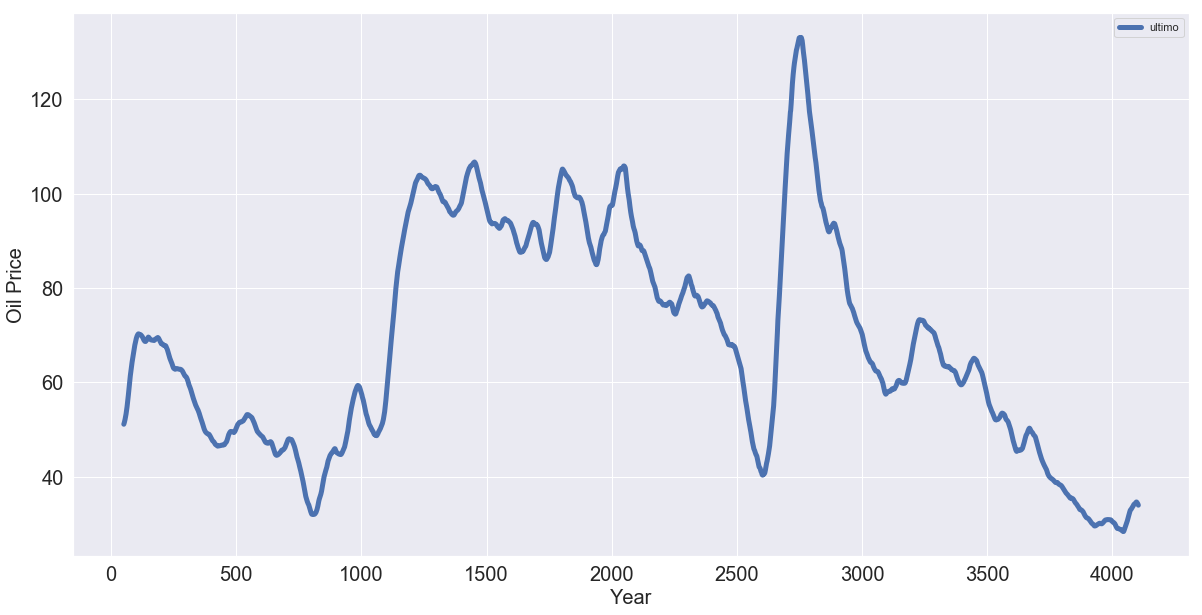

In [43]:
# remove the trend semanal
oil.rolling(52).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Oil Price', fontsize=20)
plt.xlabel('Year', fontsize=20);

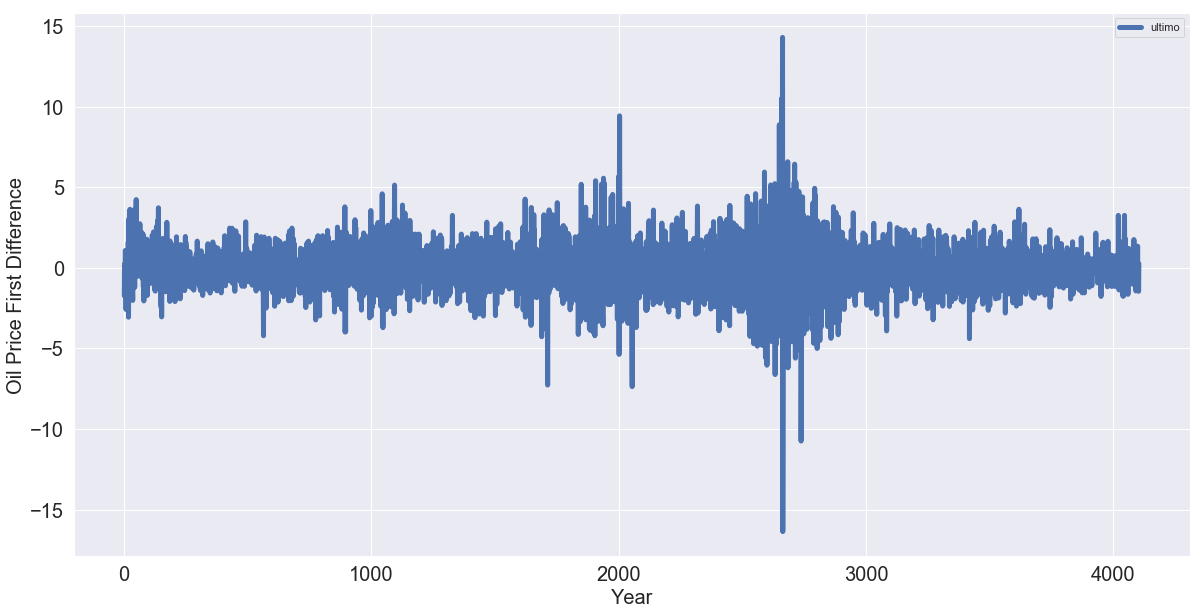

In [44]:
# first-order difference
oil.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Oil Price First Difference', fontsize=20)
plt.xlabel('Year', fontsize=20);

# 1.3. Autocorrelation

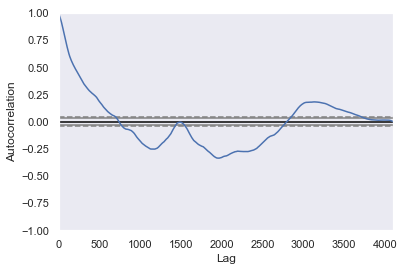

In [45]:
pd.plotting.autocorrelation_plot(oil);

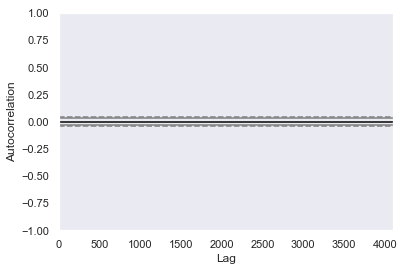

In [46]:
pd.plotting.autocorrelation_plot(oil.diff());